### House Pricing

Este dataset es una recopilacion de 265K de datos de Craigslist.org, que contiene informacion sobre viviendas en renta. El dataset contiene informacion, de las respectivas publicacion es craiglist, con fotos de los espeacion y sus respecitivas especificaciones. <br>

La idea de este proyecto surge, debido a la desinfromacion relacionada de inquilinos con sus alquileres, en general surgue mucho esto de estar pagando caro por espacio que deberia de valer menos.

Esto me llevo a intentar crear un modelo que les permitia a la gente tener un precio de referencia sobre un espacio a la hora de decidir buscar un lugar donde vivir

### Diccionario de datos

Id: listing id <br>
url: listing URL <br>
region: craigslist region <br>
region_url: region URL <br>
price: rent per month (Target Column) <br>
type: housing type <br>
sqfeet: total square footage <br>
beds:number of beds <br>
baths:number of bathrooms <br>
cats_allowed: cats allowed boolean (1 = yes, 0 = no) <br>
dogs_allowed: dogs allowed boolean <br>
smoking_allowed: smoking allowed boolean <br>
wheelchair_access: has wheelchair access boolean <br>
electric_vehicle_charge: has electric vehicle charger boolean <br>
comes_furnished: comes with furniture boolean <br>
laundry_options: laundry options available <br>
parking_options: parking options available <br>
image_url: image URL <br>
description: description by poster <br>
lat: latitude <br>
long: longitude <br>
state: state of listing <br>


# Hipotesis

Es posible crear un modelo que pueda ayudar a la gente a la hora de buscar una vivienda para alquilaer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/matiastoth/Desktop/UFO/Coder/housing_train.csv")
df.head()


,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [6]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,263771.000000,263771.000000
mean,7.040888e+09,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,8.778930e+06,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.659648,17.370780
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035963e+09,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000
50%,7.043109e+09,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.478300
75%,7.048362e+09,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.168400,-81.284600
max,7.051263e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


### Data Cleaning

Chequear que la data este correcatamente importada, eliminar las columnas irrelevantes para analisis y rellenar datos

In [7]:
# Me fijo que si existen duplicados


duplications = df[df.columns[df.columns.duplicated(keep=False)]]

# Cantidad de columnas duplicadas
num_duplicates = duplications.shape[1]

print(f"Número de columnas duplicadas: {num_duplicates}")
print(f"Estrucutura del dataset: {df.shape}")

Número de columnas duplicadas: 0
Estrucutura del dataset: (265190, 22)


In [8]:
# Quiero saber si cuanto valores unicos tienen algunas varaibles para ver su posible relevancia

df['region'].value_counts()

# Parece ser que existen varias regiones

region
jacksonville              4246
rochester                 3677
fayetteville              3652
omaha / council bluffs    2727
denver                    2671
                          ... 
corvallis/albany             3
kansas city                  3
northwest OK                 2
east oregon                  1
texoma                       1
Name: count, Length: 298, dtype: int64

In [9]:
df['state'].value_counts()

# lo mismo sucede con los estados

state
ca    33085
fl    31929
nc    18628
mi    14529
ga    13841
co    11308
ny     9991
il     9706
ks     7910
ia     7488
mn     7468
md     7451
la     7304
az     6752
oh     6558
in     6416
al     6198
nj     5711
ky     5419
ms     4973
ma     4926
id     4466
ct     3765
nd     3428
ar     3149
nm     2917
nv     2846
ne     2697
dc     2502
ak     2169
mo     2158
de     2048
hi     1840
nh     1761
mt     1339
me      420
ok       49
or       44
Name: count, dtype: int64

In [10]:
# Ahora trabajo con Objetos con el mismo objetivo que antes

print(df['laundry_options'].unique())
print(df['parking_options'].unique())


# Consider que por el momento las variable son relevantes

['laundry on site' 'w/d hookups' 'w/d in unit' nan 'laundry in bldg'
 'no laundry on site']
['street parking' 'off-street parking' nan 'carport' 'attached garage'
 'detached garage' 'no parking' 'valet parking']


### Analisis NaNs

In [11]:
df.isna().sum()

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
image_url                      0
description                    2
lat                         1419
long                        1419
state                          1
dtype: int64

In [12]:
# Dado que tenemos 265K observaciones voy a remover las filas que no tiene Laitud, Longitud, State y Descripcion

df = df.dropna(subset=["long","lat",'description','state'],axis=0)


Considero que dada la poca data, rellenar la lat y long con la moda del estado al que pertence podrias ser un opcion viable. Pero como, es probable de que pueden ser de otras regiones, mas bartas o caras, y dado el poco nivel de datos que estoy tratando. Considero que es mas facil sacarlos

In [13]:
# Relleno con con la moda de las varaible para cada tipo de espacio en renta

def rellenar_na_cat(data, var, filtro):
    return data.groupby(filtro)[var].transform(
        lambda x: x.fillna(x.mode()[0]))

In [14]:
df["laundry_options"] = rellenar_na_cat(df, "laundry_options", "type")
df["parking_options"] = rellenar_na_cat(df, "parking_options", "type")

In [15]:
df.isna().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

### Outliers

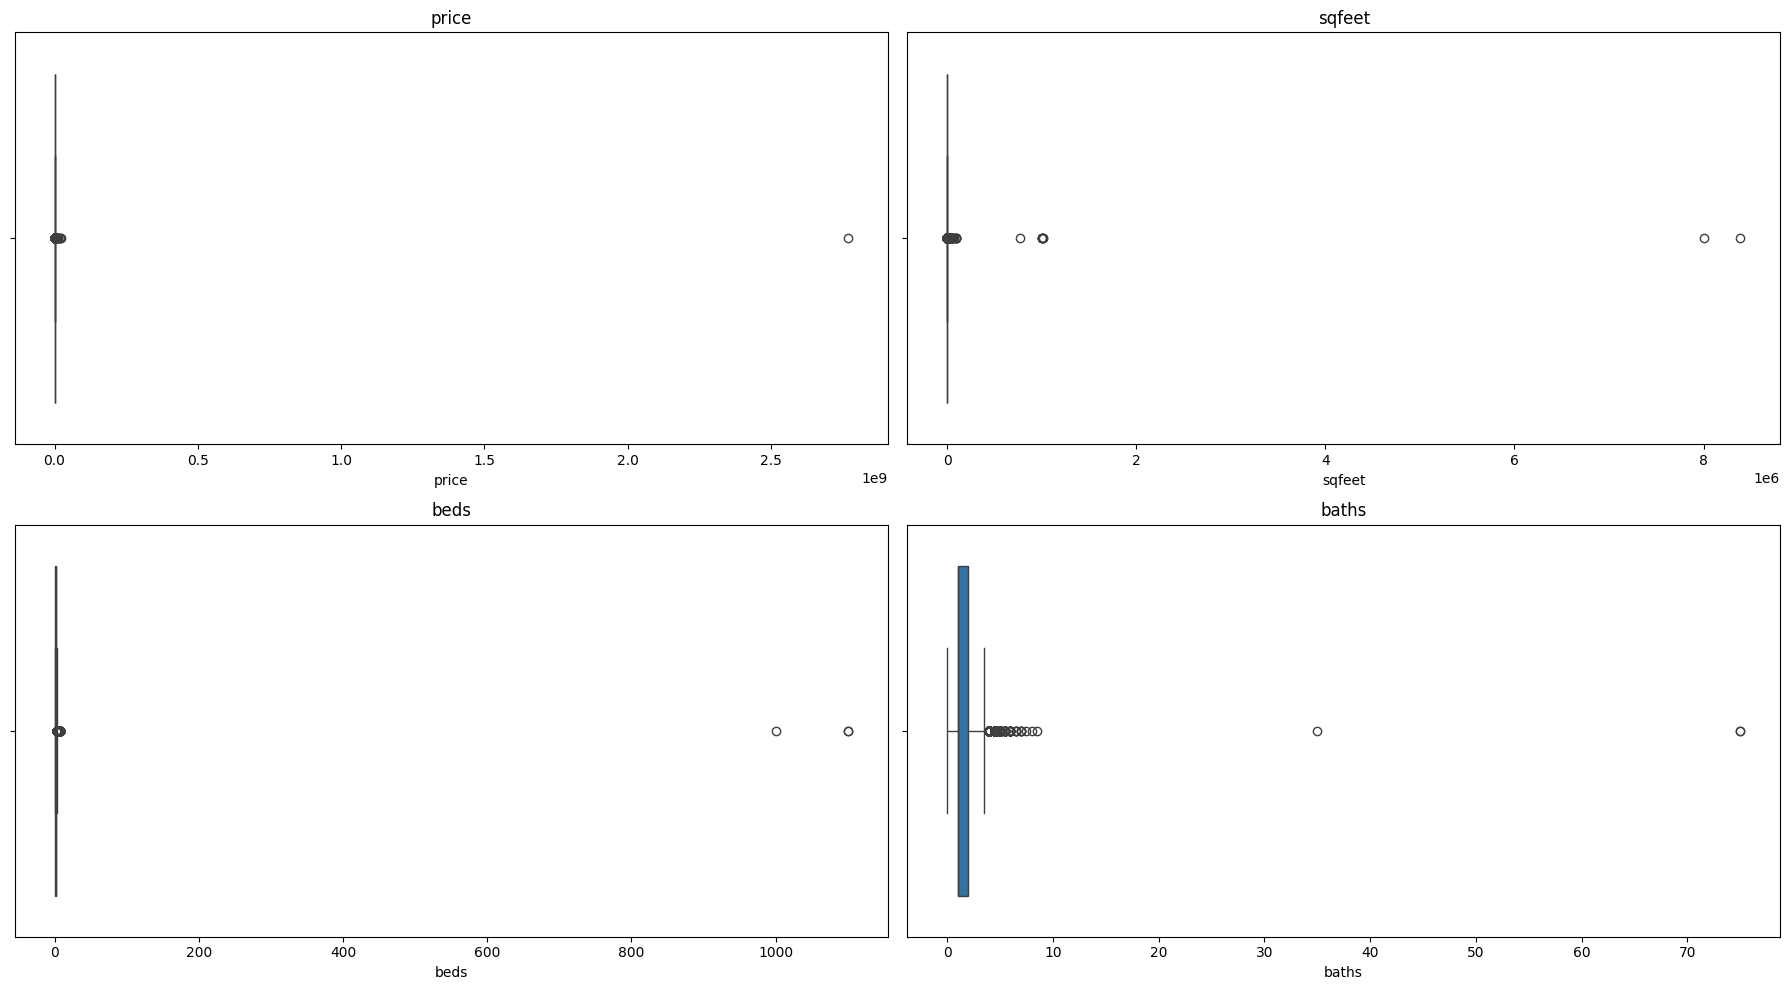

In [16]:
# Varaibles con posibles outliers:

cols_int = ['price','sqfeet','beds','baths']
filter_df = df[cols_int]

plt.figure(figsize=(18, 10))

# Traza boxplot para cada columna del DF
for columna in filter_df.columns:
    plt.subplot(2, 2, filter_df.columns.get_loc(columna) + 1)
    sns.boxplot(data=df, x=columna)
    plt.title(columna)

plt.tight_layout()

plt.show()

Podemos ver que existen unos outliers gigantes en la mayoria de la varaibles

In [17]:
# Funcion que nos da, los limites de los valores y nos comenta cuanto de los datos estan fuera usando el IQR

def out_iqr(data , column):
    global lower,upper
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    
    limits = {'lower': lower, 'upper': upper}
    
    return limits
  

In [18]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    limits = {'lower':lower , 'upper': upper}
    
    return limits

In [19]:
# IQRs y STD por variable
info = []
for col in cols_int:
    iqr = out_iqr(df, col)
    std = out_std(df, col)
    lista = {col: {'iqr':iqr, 'std':std}}
    info.append(lista)
info

[{'price': {'iqr': {'lower': -130.0, 'upper': 2398.0},
   'std': {'lower': -16160112.325567286, 'upper': 16184772.65085191}}},
 {'sqfeet': {'iqr': {'lower': 149.0, 'upper': 1757.0},
   'std': {'lower': -68299.77939350864, 'upper': 70485.57102178944}}},
 {'beds': {'iqr': {'lower': -0.5, 'upper': 3.5},
   'std': {'lower': -9.192673210027253, 'upper': 13.014138204018208}}},
 {'baths': {'iqr': {'lower': -0.5, 'upper': 3.5},
   'std': {'lower': -0.40570061748775577, 'upper': 3.3708671078638046}}}]

podemos ver que el IQR parece ser mas representativo a la hora de examinar los outliers. Ya que el desvio, al ser tan grandes los outlier achatan las campana de distribucion  afectando entonces las distancias de los desvios. <br>

Otra observacion intersentate es que, para las varaibles precio, baños y camas el lower bound toma un valor negativo lo que es imposible por ende asumiremos numeros mas logicos <br>

In [20]:
# limpiamos los outliers que si sabemos que afectan

price_upper, price_lower = 2400, 150
sqfeet_upper, sqfeet_lower = 1735, 175
beds_upper, beds_lower = 3, 1
#Estoy asumiendo que los 0.5 se dan porque los baños son toilette
baths_upper, baths_lower = 3.5, 1

df = df[(df['price'] <= price_upper) & (df['price'] >= price_lower)]
df = df[(df['sqfeet'] <= sqfeet_upper) & (df['sqfeet'] >= sqfeet_lower)]
df = df[(df['beds'] <= beds_upper) & (df['beds'] >= beds_lower)]
df = df[(df['baths'] <= baths_upper) & (df['baths'] >= baths_lower)]



print(f"Estrucutura del dataset: {df.shape}")

Estrucutura del dataset: (227090, 22)


In [21]:
# Creamos varaible adiccionales que considero relevantes

df['monoambiente'] = np.where((df['baths'] == 1) & (df['beds'] == 1), 1, 0)
df['mascotas_permitidas'] = np.where((df['cats_allowed']==1)&df['dogs_allowed']==1,1,0)
df['camas_x_p2'] = df['beds'] / df['sqfeet']
df['baños_x_cama'] = df['baths'] / df['beds']

### Posibles insights

In [22]:
# Me interesa explorar la variable 'descripcion' para poder ver si dan info que pueda llegar a ser usada en
# el analisis del precio

df['description'][2].lower()

'apartments in birmingham al welcome to 100 inverness apartment homes, a luxury apartment community tucked away into one of the most coveted locations in the city for birmingham apartments. find stylish one-, two-, and three-bedroom apartment floor plans tailored to your wants and needs, complete with the amenities that are important to you. our layouts come with just enough variety to enable you to make it your own haven unlike any other. get inspired by our photos and the serenity of the nature surrounding you to let your aesthetic come together with our stylish, modern designs for a home you wonâ\x80\x99t be able to wait to show off to your guests. even beyond style, our pet-friendly apartment community is also all about functionality! some of our homes come with washer and dryer hookups, wood burning fireplaces, hardwood floors, and a private patio or balcony. all of our residents can make use of oversized walk-in closets, air conditioning, garages, a business center, on-site manag

Podemos ver que existe informacion interesante, como la existencia pileta, cerca de centro de enternimiento (shoppings, restaurantes, etc), gimnasios y parques

In [23]:
# Me fijo si la descirpcion contiene alguno de estos espacios claves que podrian influenciar el precio

[x in df['description'][2].lower() for x in ['pool', 'mall','grilling','fitness', 'court']]


[True, False, True, True, True]

In [24]:
# Creo varaible booleana para cada espacio de interes

df['tiene_pileta'] = df['description'].apply(lambda x: 1 if 'pool' in x.lower() or 'swimming' in x.lower() else 0)
df['tiene_parilla'] = df['description'].apply(lambda x: 1 if 'grill' in x.lower() or 'grilling' in x.lower() or 'grills' in x.lower() else 0)
df['deporte_cerca'] = df['description'].apply(lambda x: 1 if 'gym' in x.lower() or 'fitness' in x.lower() or 'sport' in x.lower() or 'sports' in x.lower() 
                                                    or 'tennis' in x.lower() or 'soccer' in x.lower() or 'soccers' in x.lower() or 'court' in x.lower() else 0)
df['colegio_cerca'] = df['description'].apply(lambda x: 1 if 'school' in x.lower() or 'college' in x.lower() else 0)
df['entretenimiento_cerca'] = df['description'].apply(lambda x: 1 if 'shopping' in x.lower() or 'mall' in x.lower() else 0)


In [25]:
# chequeo como quedaron las nuevas variabeles

for var in ['tiene_pileta', 'tiene_parilla', 'deporte_cerca', 'colegio_cerca',
            'entretenimiento_cerca',]:
    print(df[var].value_counts())


tiene_pileta
1    120762
0    106328
Name: count, dtype: int64
tiene_parilla
0    192197
1     34893
Name: count, dtype: int64
deporte_cerca
1    125452
0    101638
Name: count, dtype: int64
colegio_cerca
0    188819
1     38271
Name: count, dtype: int64
entretenimiento_cerca
0    131005
1     96085
Name: count, dtype: int64


In [26]:
#Por ultimo, me gustaria observar las variable categorica. Ya que observe, que existen muchas categorias en alguna de estas

df_ca_cols = df.select_dtypes(include=object).columns

for col in df_ca_cols[1:]:
    print(f"column name : {df[col].value_counts().head(15)}")

column name : region
jacksonville               4071
fayetteville               3469
rochester                  3234
omaha / council bluffs     2526
augusta                    2451
savannah / hinesville      2419
orlando                    2388
lincoln                    2356
colorado springs           2337
jackson                    2331
stockton                   2321
fort collins / north CO    2318
inland empire              2270
reno / tahoe               2254
charlotte                  2245
Name: count, dtype: int64
column name : region_url
https://omaha.craigslist.org           2526
https://fayetteville.craigslist.org    2520
https://jacksonville.craigslist.org    2487
https://augusta.craigslist.org         2451
https://savannah.craigslist.org        2419
https://orlando.craigslist.org         2388
https://lincoln.craigslist.org         2356
https://cosprings.craigslist.org       2337
https://stockton.craigslist.org        2321
https://fortcollins.craigslist.org     2318
https://

In [27]:
# me gustaria ver mejor la varaible state

df['state'].value_counts().head(30)

# considerare que solo los estados con mas de 2000 obervaciones son relevantes

state
fl    28403
ca    23857
nc    17250
mi    13018
ga    12961
co     9693
il     7977
ny     7822
md     6848
ia     6804
la     6631
ks     6630
mn     6539
az     5950
oh     5914
in     5871
al     5697
ky     4932
ms     4490
nj     4443
id     3732
ma     3603
nd     3275
ct     3050
ar     2876
nv     2565
ne     2474
nm     2251
ak     1865
de     1832
Name: count, dtype: int64

Como podemos ver, algunas variable ('type','laundry_options','parking_options','state'), tiene casi el total de su concentracion de datos en unas pocas opciones. 

Alguna de las opciones no tienen suficiente informacion y podriamos considerarlas como 'outliers' en cierta forma. Es por esto, que para que no traigan problemas en el modelo y ademas mejore el poder computacional, voy a agrupar las variable chicas en una misma categoria llamada que llamaremos 'raras'.

Por otro lado, existe el caso de alguna variable ('region') que simplemente tienen la informacion demasiado distribuida y es dificil poder general valor de esas, es por eso que esas las eliminare. Al igual que las varaible que de por si no puedan ser analizada o ageguen valor para la creacion del modelo

In [28]:
etiquetas = {
     'type': 
        ['apartment', 'condo', 'house', 'townhouse','manufactured','duplex'],
     'laundry_options': 
        ['laundry in bldg', 'laundry on site', 'w/d hookups', 'w/d in unit'],  
     'parking_options': 
        ['attached garage', 'carport', 'detached garage', 'off-street parking', 'street parking'],
     'state': 
        ['fl', 'ca', 'nc', 'mi', 'ga', 'co', 'il', 'ny', 'md', 'ia', 'la', 'ks',
       'mn', 'az', 'oh', 'in', 'al', 'ky', 'ms', 'nj', 'id', 'ma', 'nd', 'ct',
       'ar', 'nv', 'ne', 'nm']
}

columns = ['type','laundry_options','parking_options','state']
# Rempazamos por raro, si la etiqueta no se encuentra en el diccionario de etiquetas comunes
for col in columns:
    df[col] = np.where(df[col].isin(etiquetas[col]), df[col], 'raro')

### Drop columnas

In [29]:
print(f'Nombre de las columnas:{df.columns}')
print(f"Estrucutura del dataset: {df.shape}")

# elimino varaible irrelevantes para el analisis de la varaible precio
df.drop(columns = ['id','url','region','region_url','beds',
       'baths','cats_allowed', 'dogs_allowed','image_url', 'description'], inplace = True)

print(f'Nombre de las columnas:{df.columns}')
print(f"Nueva estrucutura del dataset: {df.shape}")

Nombre de las columnas:Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state', 'monoambiente', 'mascotas_permitidas', 'camas_x_p2',
       'baños_x_cama', 'tiene_pileta', 'tiene_parilla', 'deporte_cerca',
       'colegio_cerca', 'entretenimiento_cerca'],
      dtype='object')
Estrucutura del dataset: (227090, 31)
Nombre de las columnas:Index(['price', 'type', 'sqfeet', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state', 'monoambiente',
       'mascotas_permitidas', 'camas_x_p2', 'baños_x_cama', 'tiene_pileta',
       'tiene_parilla', 'deporte_cerca', 'colegio_cerca',
       'entretenimiento_cerca'],
      dtype='ob

Considero que estas varaible por su naturaleza, no aporta para informacion relevante para la creacion de el modelo, ni para el analisis de la variable precio

# EDA

En esta seccion me dedicare a entender e identificar, la diferentes relaciones que pueden llegar a tener, la variable objetivo, el precio, con las distintas varaibles creadas previamente

#### como esta compuesto el rango de precios?

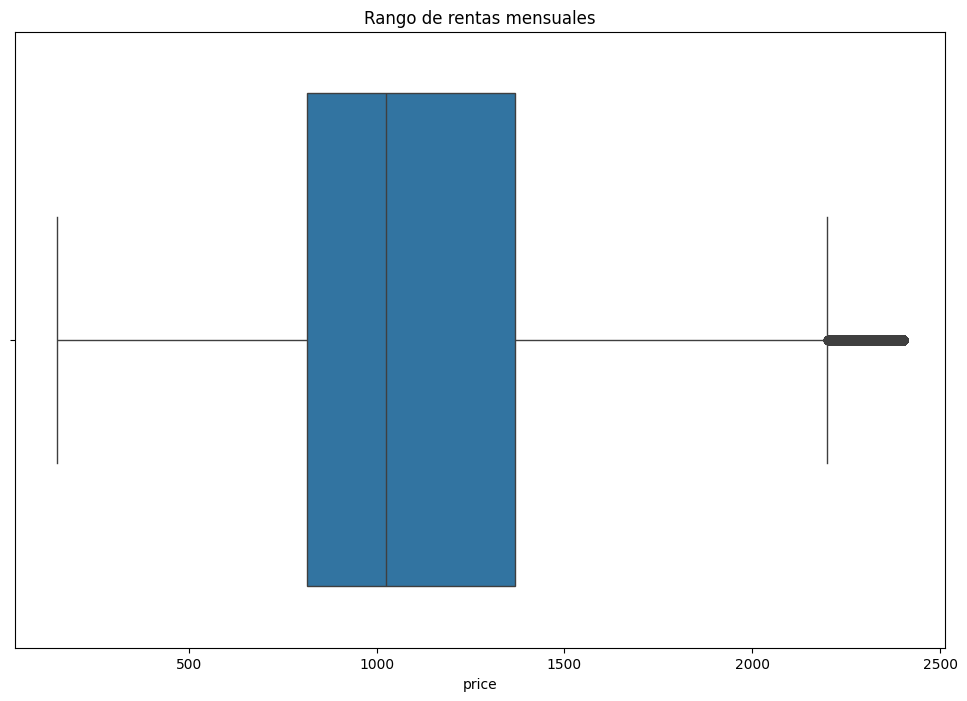

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='price')
plt.title('Rango de rentas mensuales')

plt.show()

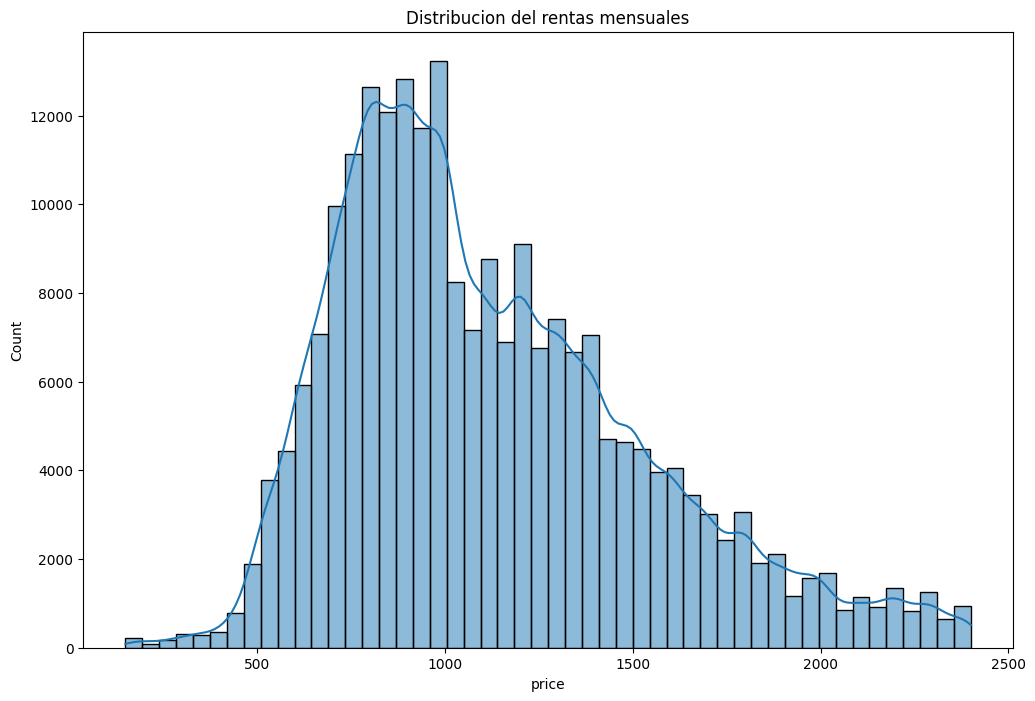

media de precio mensual por alquier: 1122 $USD


In [31]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='price',bins=50, kde=True)
plt.title('Distribucion del rentas mensuales')

plt.show()

print('media de precio mensual por alquier:', int(df['price'].mean()),'$USD')

Podemos ver que la mayoria, de los datos se concentrarian entre los 500 y 1500 dolares. <br>

Por otro lados, alogo muy interesante es que una vez que pasa la media parece caer bastante lenta la distribucion en el segundo grafico.

Trabjaremos luego sobre esta distribucion, para intentar hacerla mas parecia a una distribucion normal, ya que esto nos podria ayudar a mejorar las predicciones

#### como afectan los tipos de espacio en renta a la distribucion del precio?


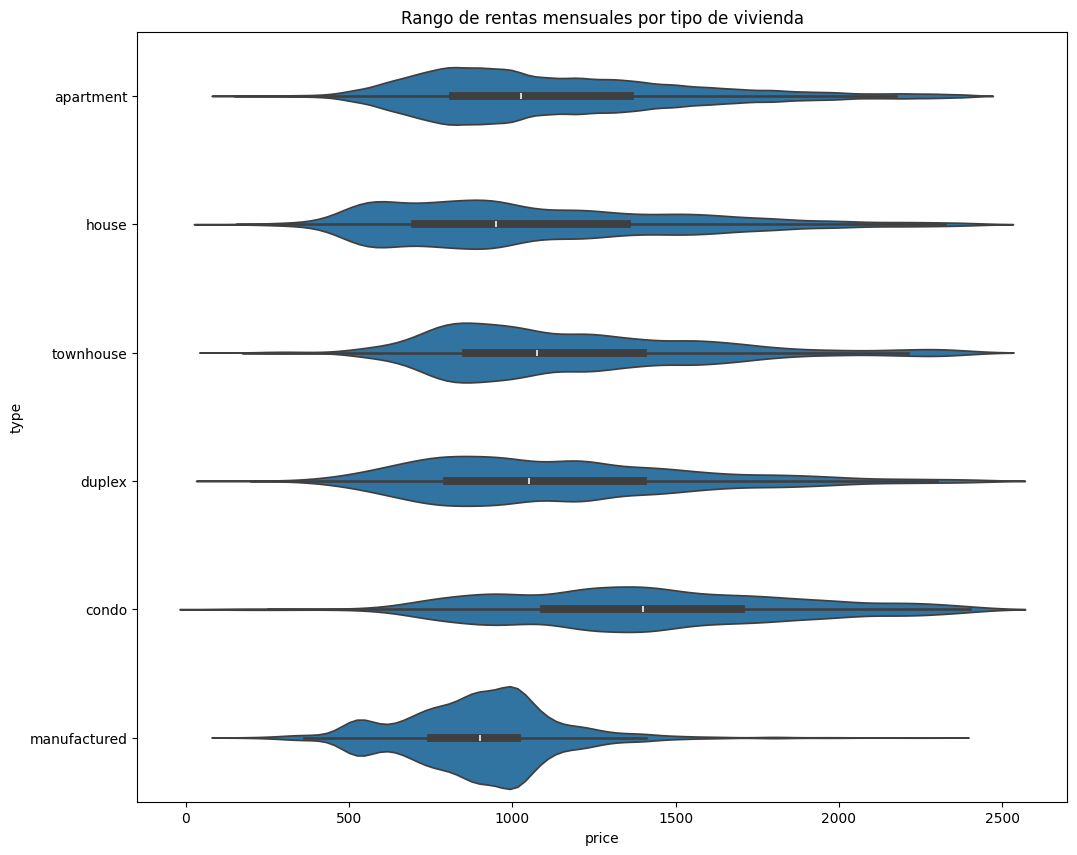

medias para los ditintos tipos de viviendas :
            type  Precio_Medio  Total_Observaciones
0     apartment   1122.841647               194489
3         house   1056.617434                13663
6     townhouse   1169.300568                 8444
1         condo   1400.786211                 3597
2        duplex   1131.559136                 2917
4  manufactured    897.904727                 2750
5          raro   1231.765854                 1230


In [32]:
plt.figure(figsize=(12, 10))
sns.violinplot(data=df, x='price', y ='type', order=['apartment','house','townhouse','duplex','condo','manufactured'])
plt.title('Rango de rentas mensuales por tipo de vivienda')

plt.show()

print(f"medias para los ditintos tipos de viviendas :\n {df.groupby('type').agg(Precio_Medio=('price', 'mean'), Total_Observaciones=('price', 'count')).reset_index().sort_values(by='Total_Observaciones', ascending=False)}")

En base a este grafico y a la tabla podemos ver que en general, si bien existe una diferencia en las medias de precio, en lo que respecta a la distribucion de precio por tipo de vivienda son bastante similares todas. Esto quiere decir que, existe todo tipo de precio para estas

#### Existe estados mas caros/baratos ?

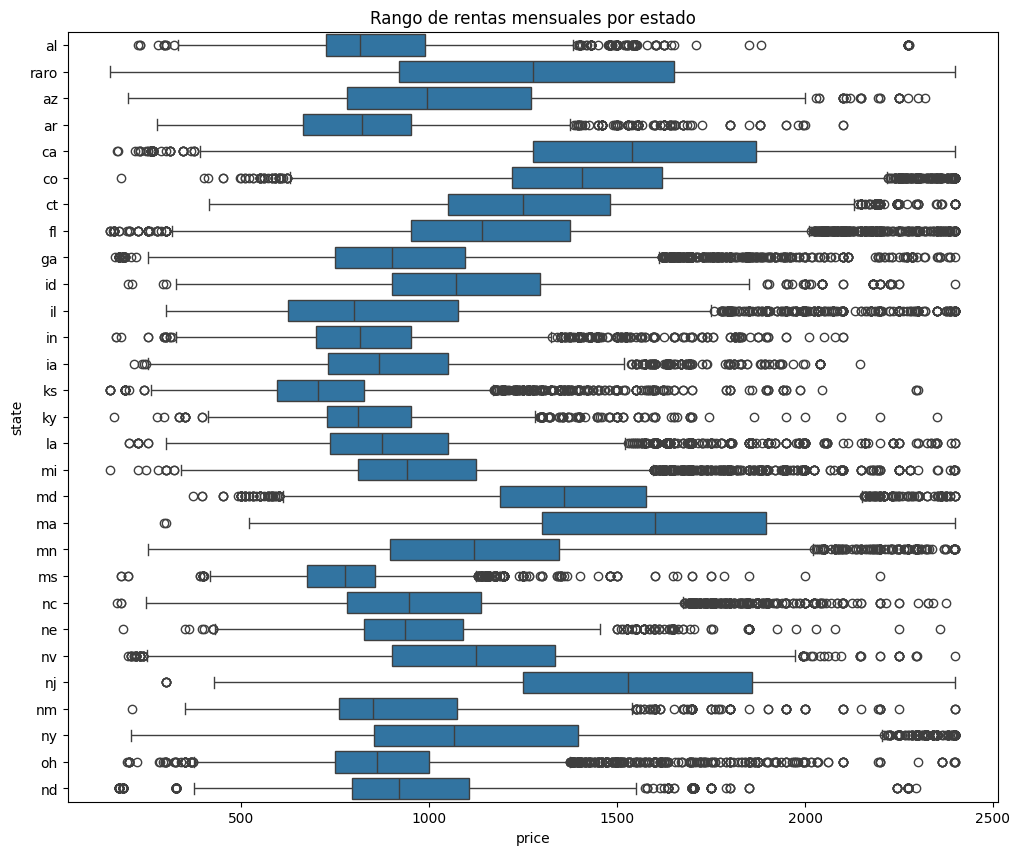

In [110]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x='price', y ='state')
plt.title('Rango de rentas mensuales por estado')

plt.show()

En el caso de estado, sucede algo similar que con el tipo de viviendas, existen todos tipo de precios asociados a los distintos estados. Pero en este caso, si podemos observa algunos de los precios medios bastante distintos entre si, como por ejemplo: 'ks', 'ms', 'ca', 'nj' y 'co'

#### Influye la comodidad en el precio de renta?

El objetivo es analizar las variable creadads apartir de la variable descripcion y analizar, si tenerlas o no (ya que son  varaible binomiales), tiene un impacto en el precio de renta.

Emn primera instancia creeria que si ya que, los amenitis, son plus que facilitan la vida de a gente por ende, tenderia a creer que la gente estaria dispuesta a pagar mas por poder contar con ello

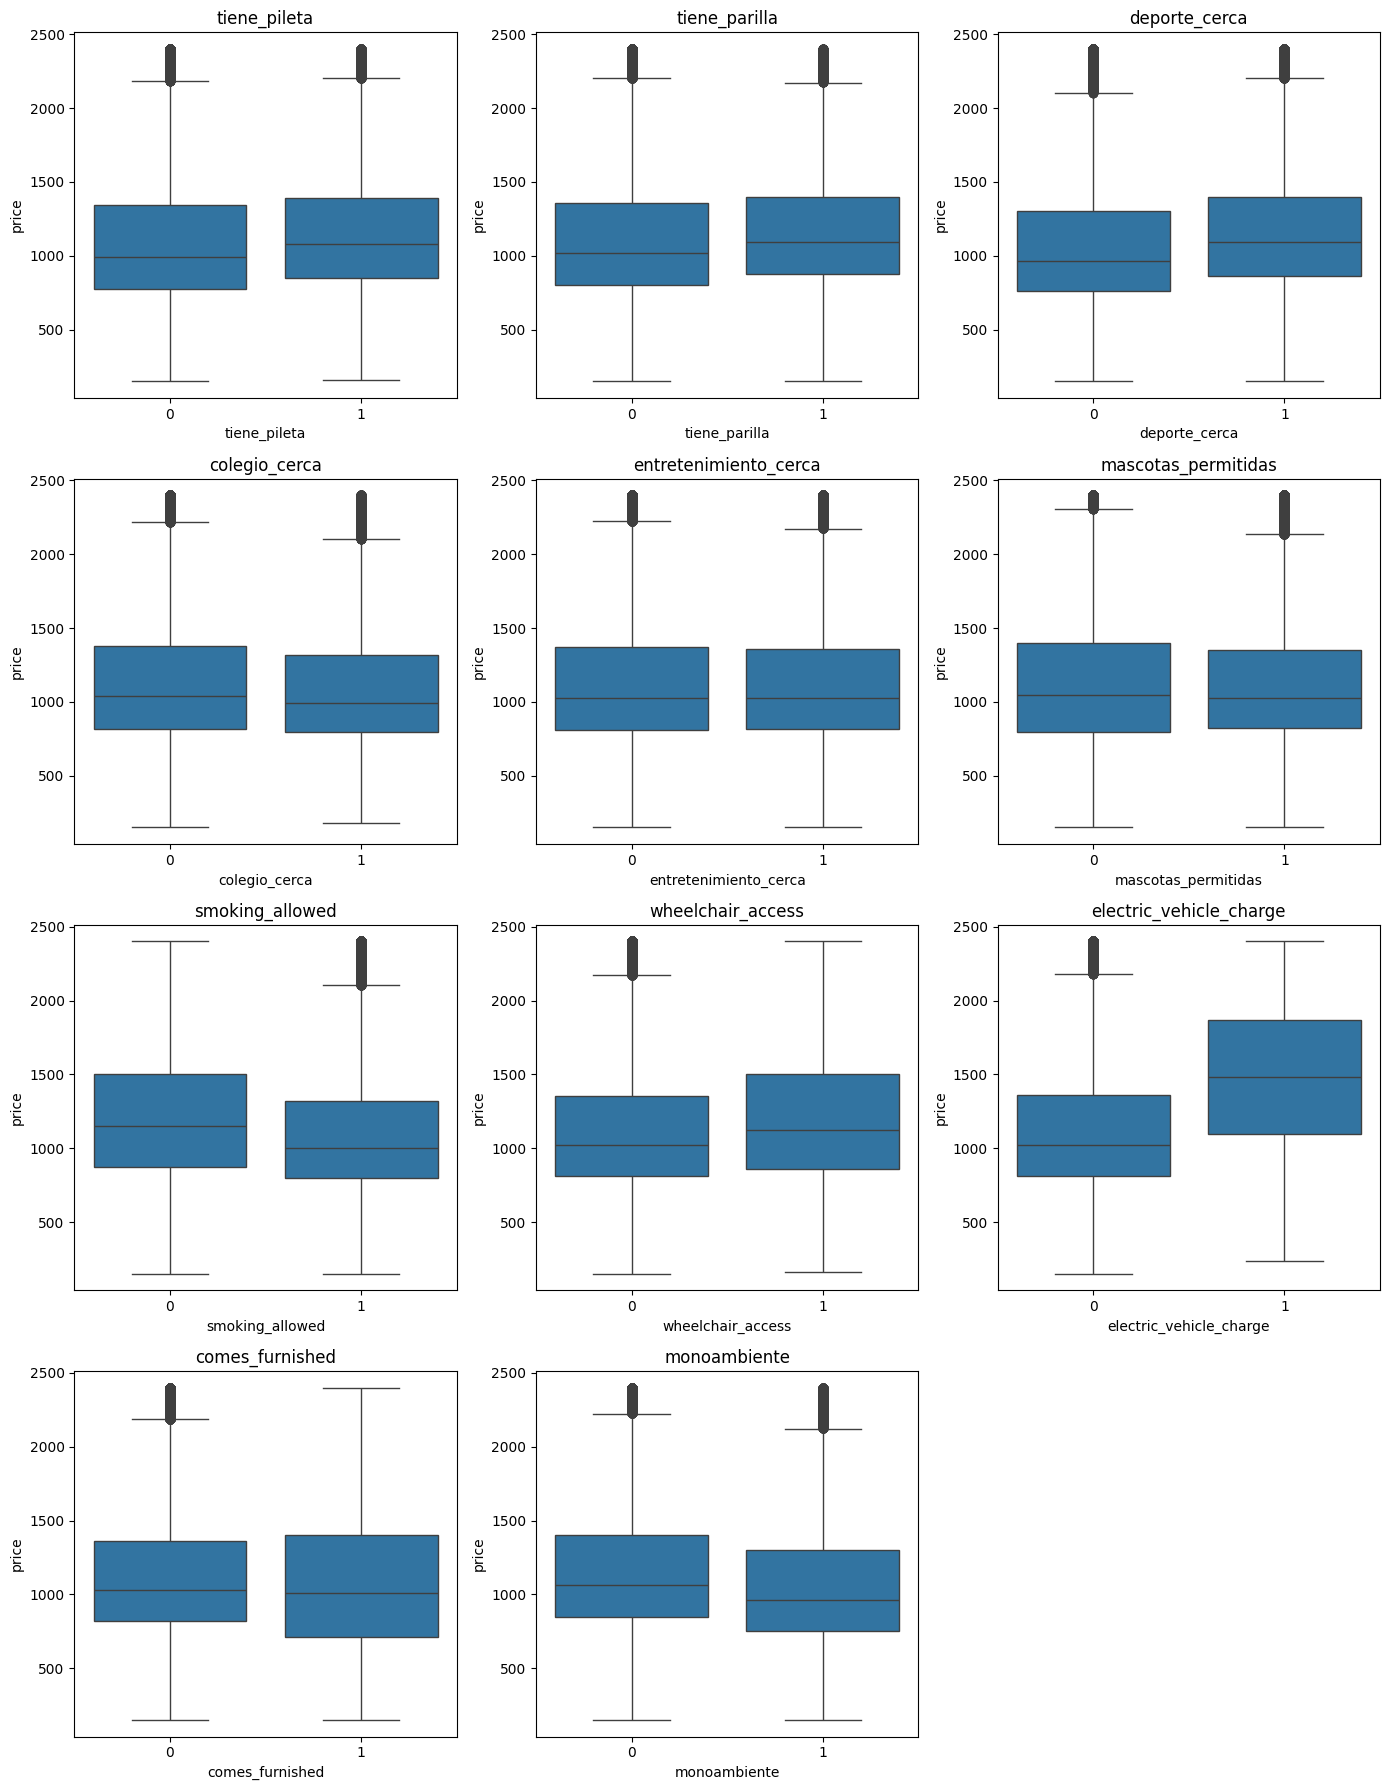

In [33]:
columnas = ['tiene_pileta','tiene_parilla','deporte_cerca','colegio_cerca','entretenimiento_cerca','mascotas_permitidas', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'monoambiente']

plt.figure(figsize=(14, 18))

i = 0
for col in columnas:
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, y='price', x =col)
    plt.title(col)
    i = i + 1

plt.tight_layout()
plt.show()


Como primera observacion esta el ver que no todas las opciones tiene un impacto positivo en el precio. <br>

Para mi sorpersa, varaible como amueblada , entertenimiento cerca, mascotas permitidas ,pareceria que no tiene atractivo en el precio <br>

La unica que parece estar teniendo un verdero impacto en el precio, son la viviendas con cargador de vehiculo electrcio


#### Que impacto tiene los metros cuadros en el precio? 

Yendo ya mas al analsis del el espacio en si. Creo que es normal esperar una fuerte correlacion entre metro^2 y precio. Ya que uno tiene a creer que cuanto mas grande mas caro

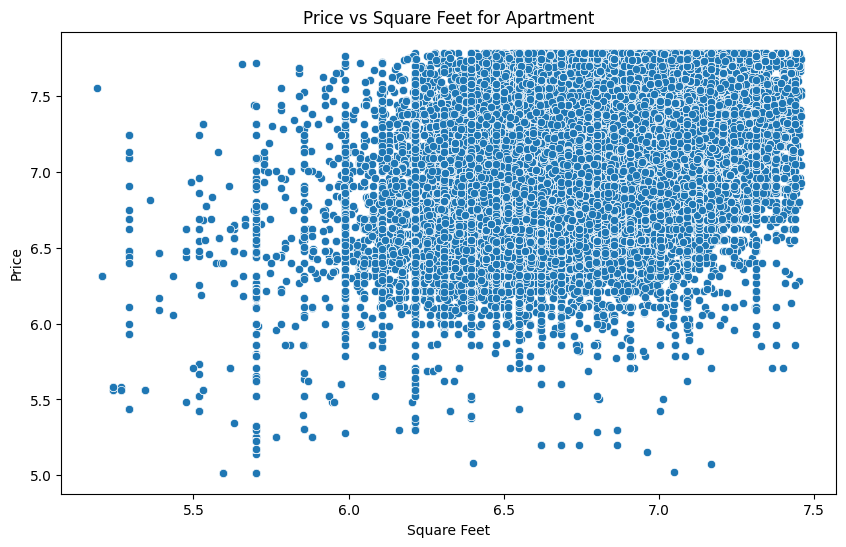

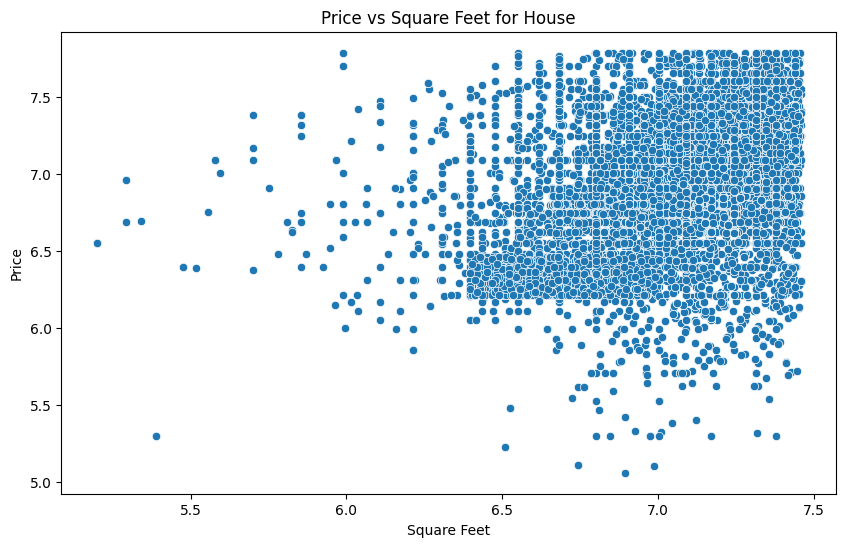

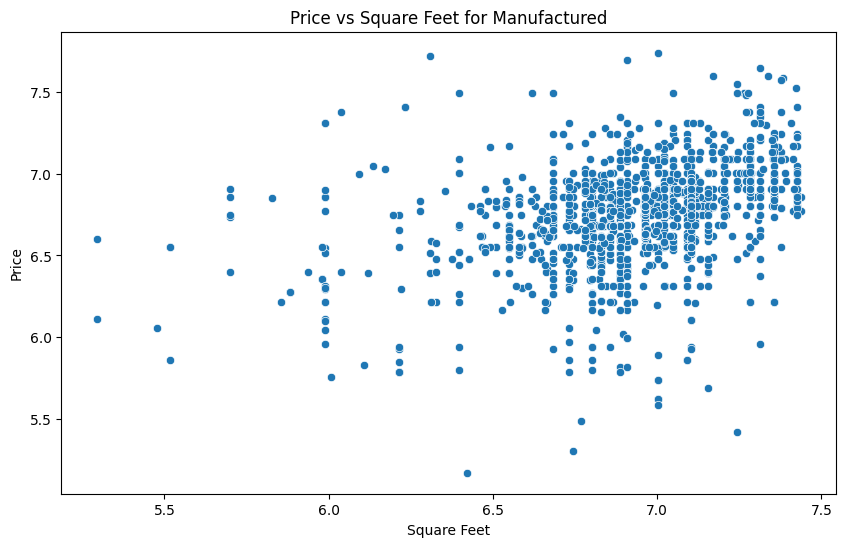

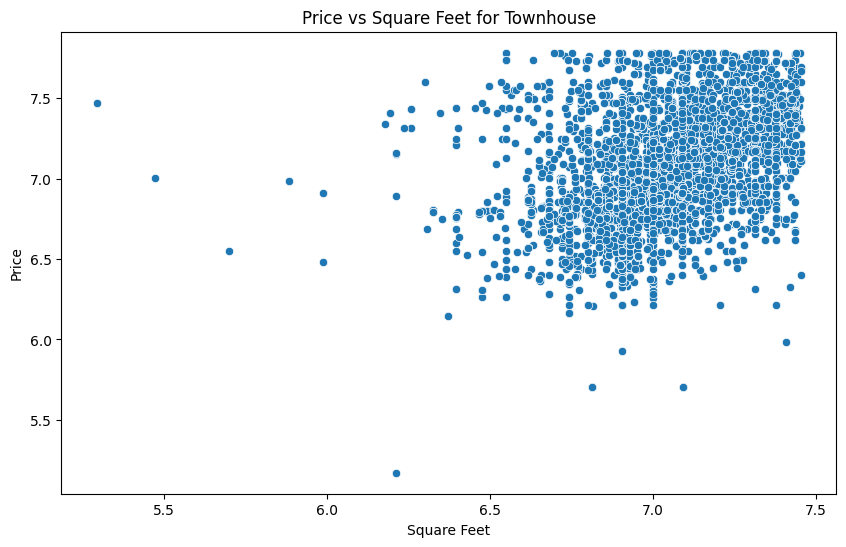

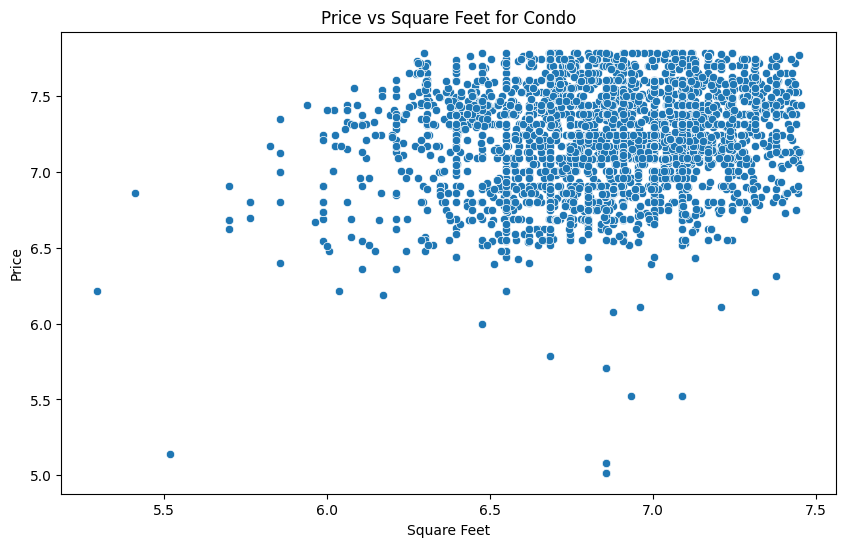

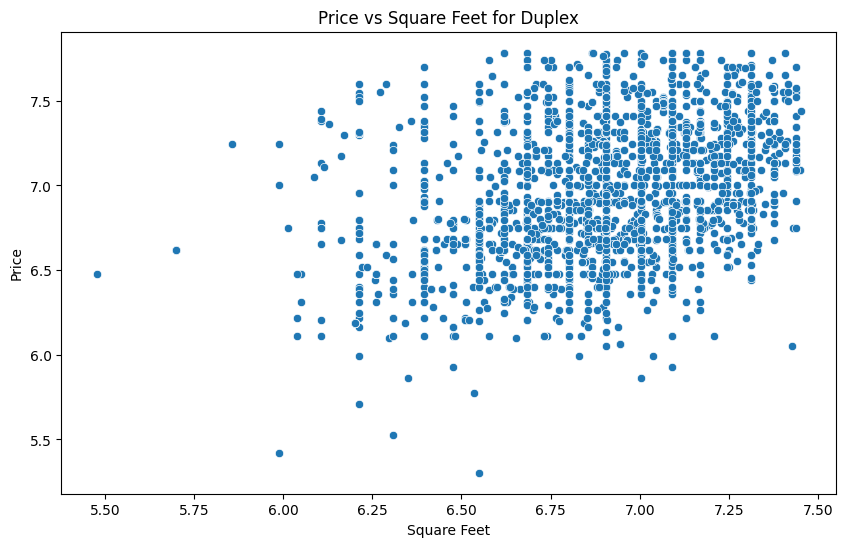

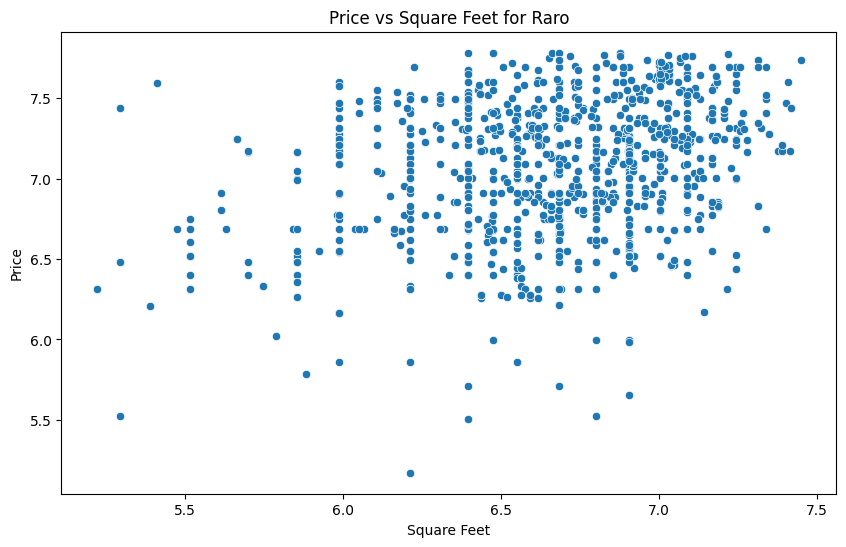

In [36]:

for house_type in df['type'].unique():
    plt.figure(figsize=(10, 6))
    subset_df = df[df['type'] == house_type]
    sns.scatterplot(x = np.log(subset_df['sqfeet'] - 1), y=  np.log(subset_df['price'] + 1))
    plt.xlabel('Square Feet')
    plt.ylabel('Price')
    plt.title(f'Price vs Square Feet for {house_type.capitalize()}')
    plt.show()

Pareceria ser que para la mayorias de las opciones, menos Condo, existe una pequeña correlacion positiva entre pies cuadrados y precio. Indicando que cuanto mayor es el espacio en renta, mayor tiende a ser el precio de alquiler de este


#### Como se coporta el precio cuando la cantidad de camas por pies cuadrados aumenta?

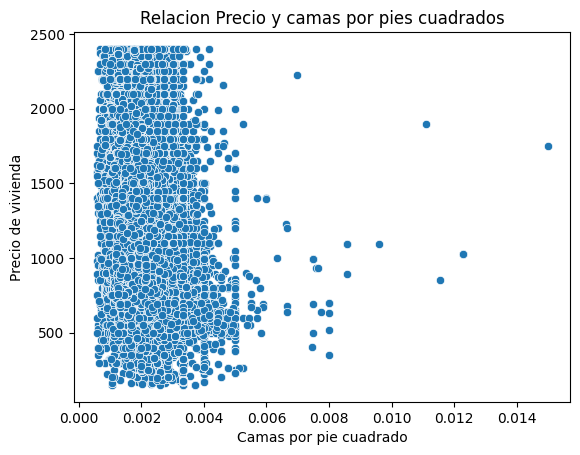

In [113]:
sns.scatterplot(x = df['camas_x_p2'], y=df['price'])
plt.xlabel('Camas por pie cuadrado')
plt.ylabel('Precio de vivienda')
plt.title('Relacion Precio y camas por pies cuadrados')

plt.show()

En base a los resultado, no podemos sacar ninguna conclusion util. 

Parece haber todo tipo de precio para las relacion camas x pies cuadrados, uno tenderia a creer que podria haber cierta relacion concava entre las variables, donde un numero muy chico indica que el espacio es demsadia grande para la cantidad de cuarto y lo contrario para la inversa

#### Son los monoambiente mas baratos ?

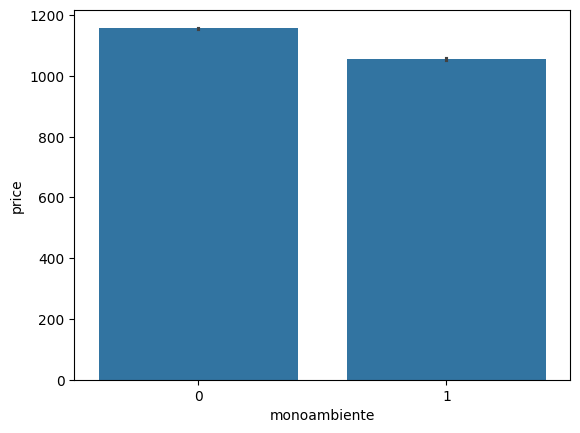

precio promedio si es monoambiente
0    1156.035953
1    1056.461277
Name: price, dtype: float64


In [114]:
sns.barplot(x = df['monoambiente'], y = df['price'])
plt.show()

print(f"precio promedio si es {df.groupby('monoambiente')['price'].mean()}")

Como era de esperar, se puede ver que en promedio, los monohambientes son mas baratos que el resto de opciones.

### tiene impacto el parking en el precio?

Voy a analizar el precio para los distintos tipos de vivienda, ya que considero que no es lo mismo las disitntas opciones para cada una de estas

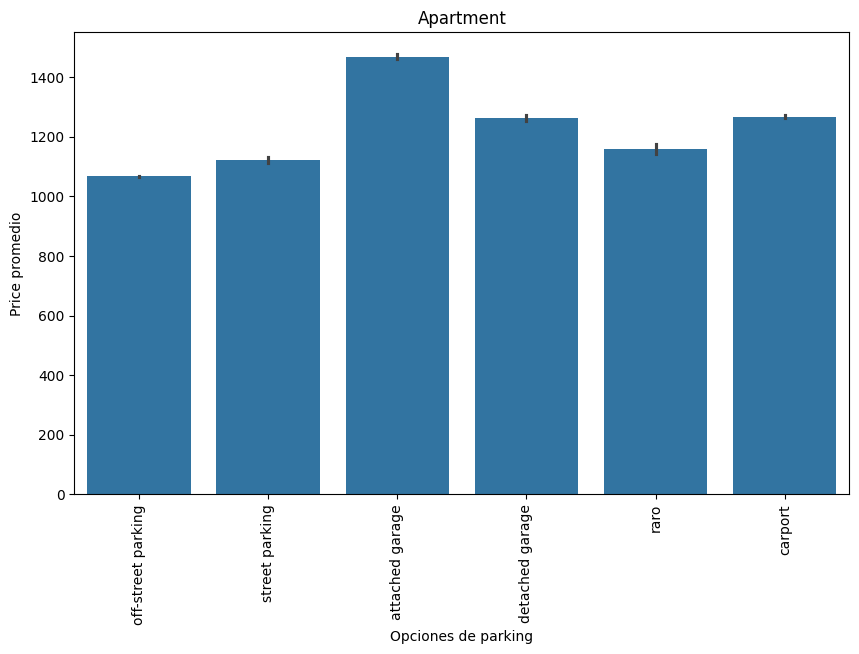

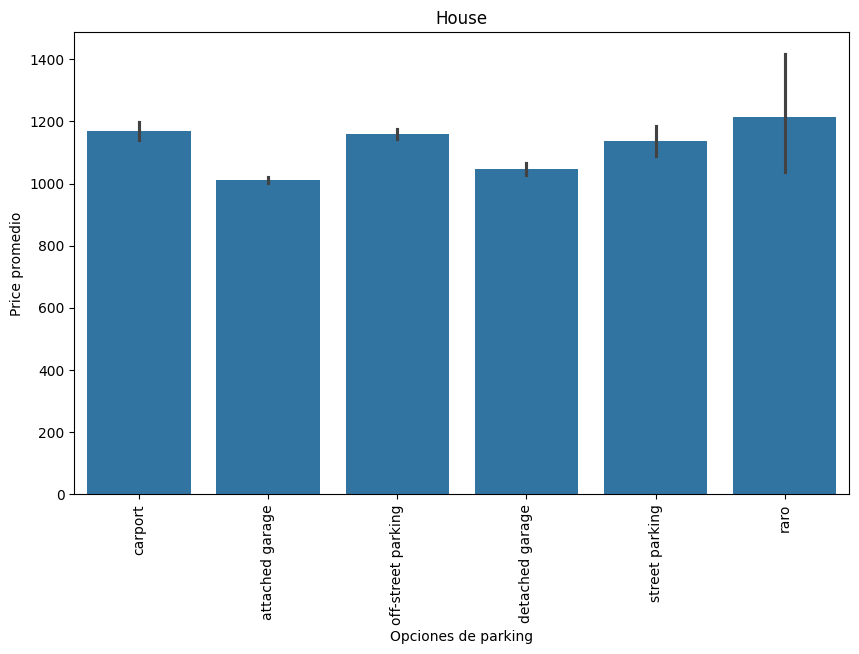

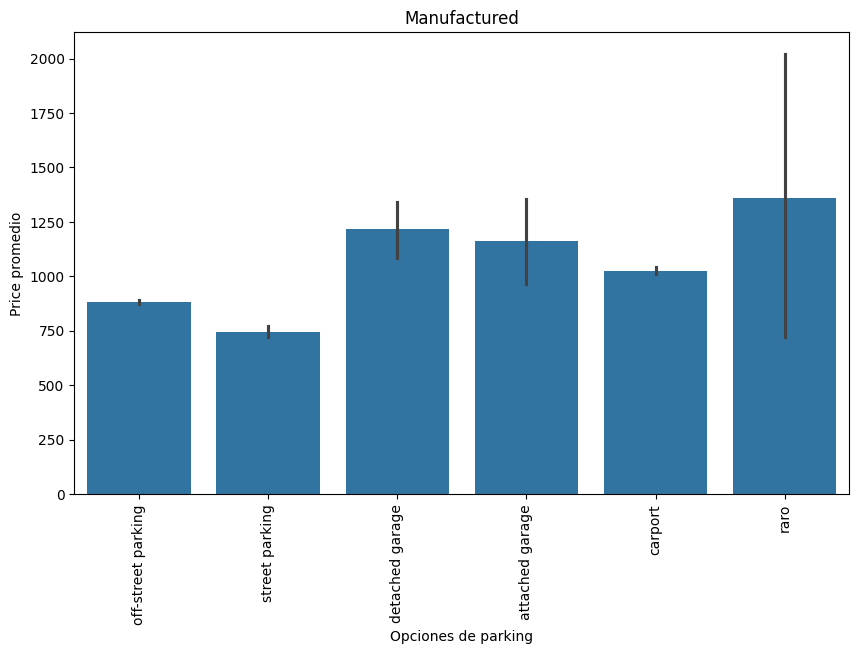

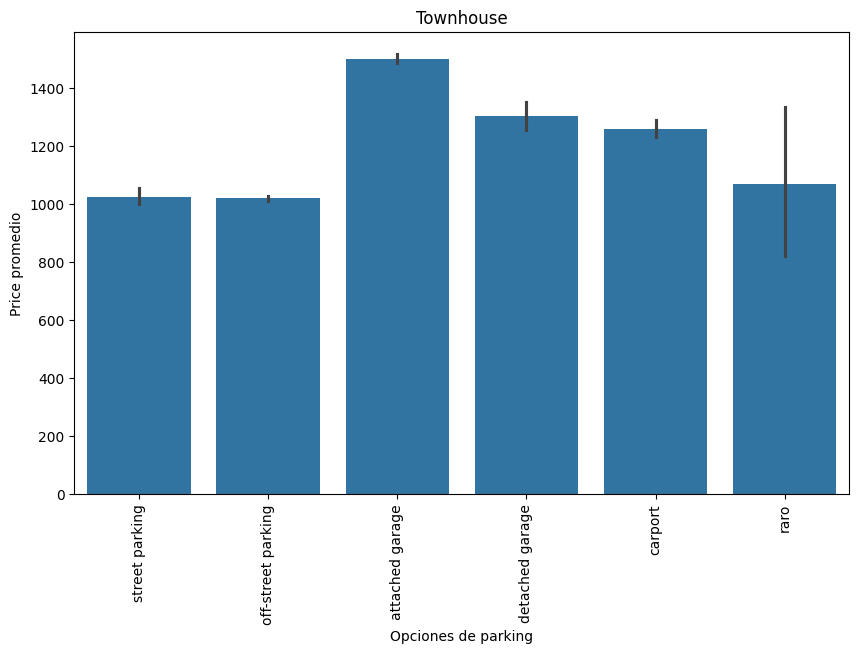

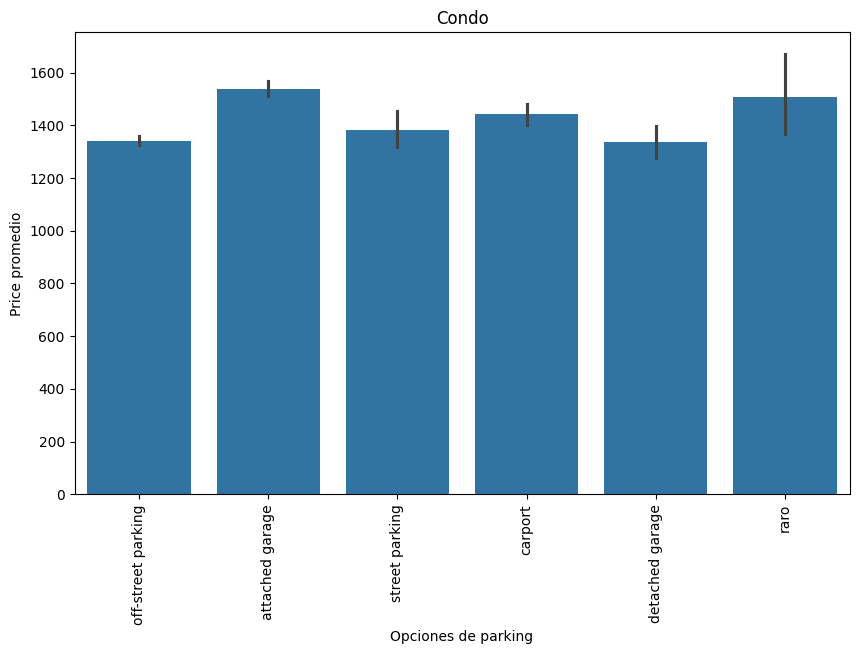

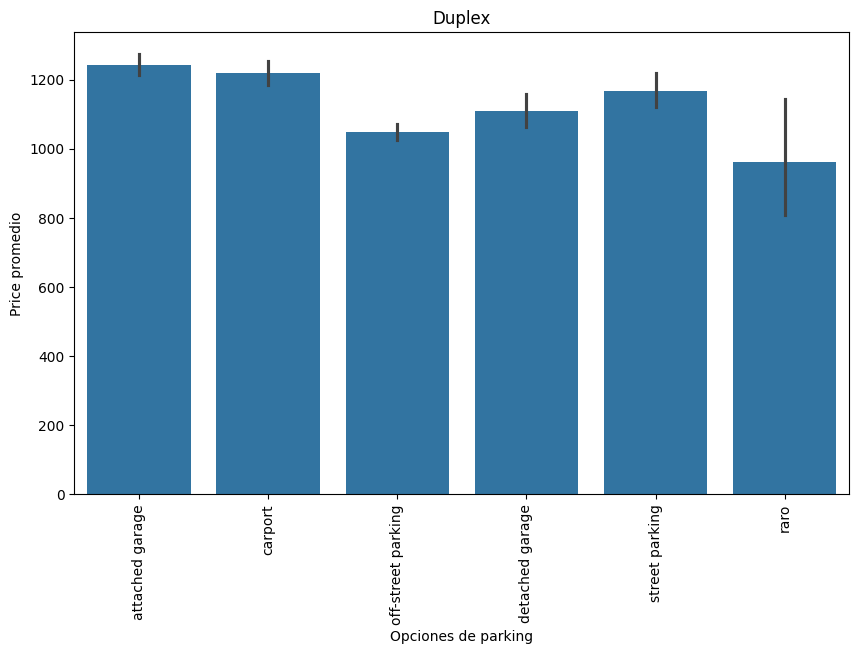

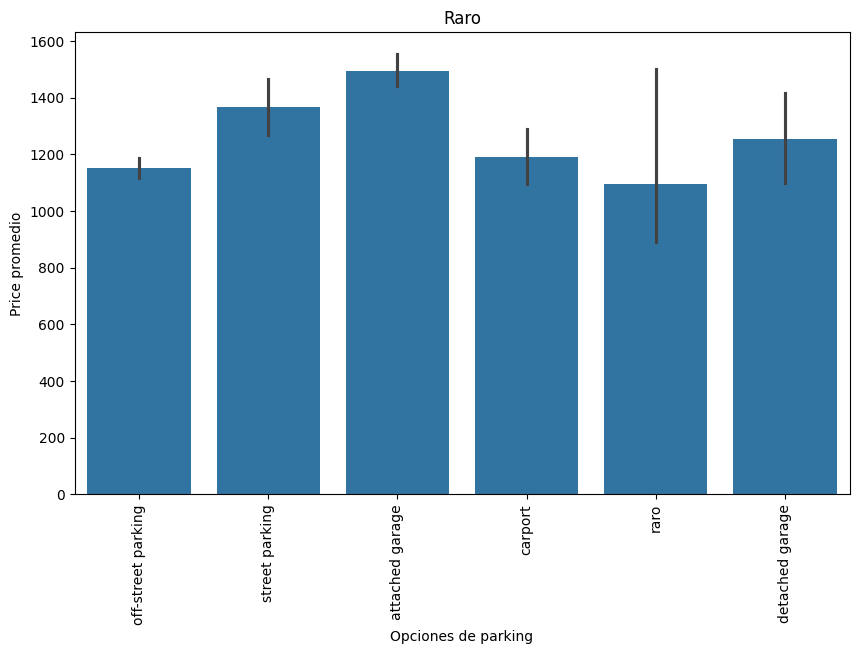

In [127]:

for house_type in df['type'].unique():
    plt.figure(figsize=(10, 6))
    subset_df = df[df['type'] == house_type]
    sns.barplot(x = subset_df ['parking_options'], y = subset_df['price'])
    plt.xlabel('Opciones de parking')
    plt.ylabel('Price promedio')
    plt.title(f'{house_type.capitalize()}')
    plt.xticks(rotation=90)

plt.show()



En base a los resultado puedo observar, 1 cosas clara, que independientemente del typo de vivienda, que tengan un garage, es en general la opcion mas cara.

El restado de las opciones varian para los distintos tipos de vivienda, pero suelen ser mas caras las opciones con espacio gaurda coche


# Feature Engennering

En esta etapa me voy a dedicar a terminar de preparar los datos para que que permofrmen de manera mas eficiente en los alogritmos.

Para ello, voy trasnformar las variables categoricas, intentar de centrar y normalizar las varaibles numericas y finalmente, seleccionare las varaible que considere relveante para las predicciones.



### Transformacion de variables categoricas

In [37]:
# Encodeos varaibles categoricas

# hot one para las variables con pocas categorias
df = pd.get_dummies(df, columns=['laundry_options','parking_options','type'], drop_first= True)

# label encoding para las varaible con mas de 10 categorias
sorted_state = df['state'].value_counts().index.tolist()
mapeado = {state: index for index, state in enumerate(sorted_state)}
df['state'] = df['state'].map(mapeado)

df.head()


,price,sqfeet,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,state,monoambiente,...,parking_options_detached garage,parking_options_off-street parking,parking_options_raro,parking_options_street parking,type_condo,type_duplex,type_house,type_manufactured,type_raro,type_townhouse
1,1120,1319,1,0,0,0,33.3755,-86.8045,17,0,...,False,True,False,False,False,False,False,False,False,False
2,825,1133,1,0,0,0,33.4226,-86.7065,17,0,...,False,False,False,True,False,False,False,False,False,False
3,800,927,1,0,0,0,33.4226,-86.7065,17,1,...,False,False,False,True,False,False,False,False,False,False
4,785,1047,1,0,0,0,33.4226,-86.7065,17,0,...,False,False,False,True,False,False,False,False,False,False
5,900,1298,1,0,0,0,33.4226,-86.7065,17,0,...,False,False,False,True,False,False,False,False,False,False


### Transformacion de variables numericas

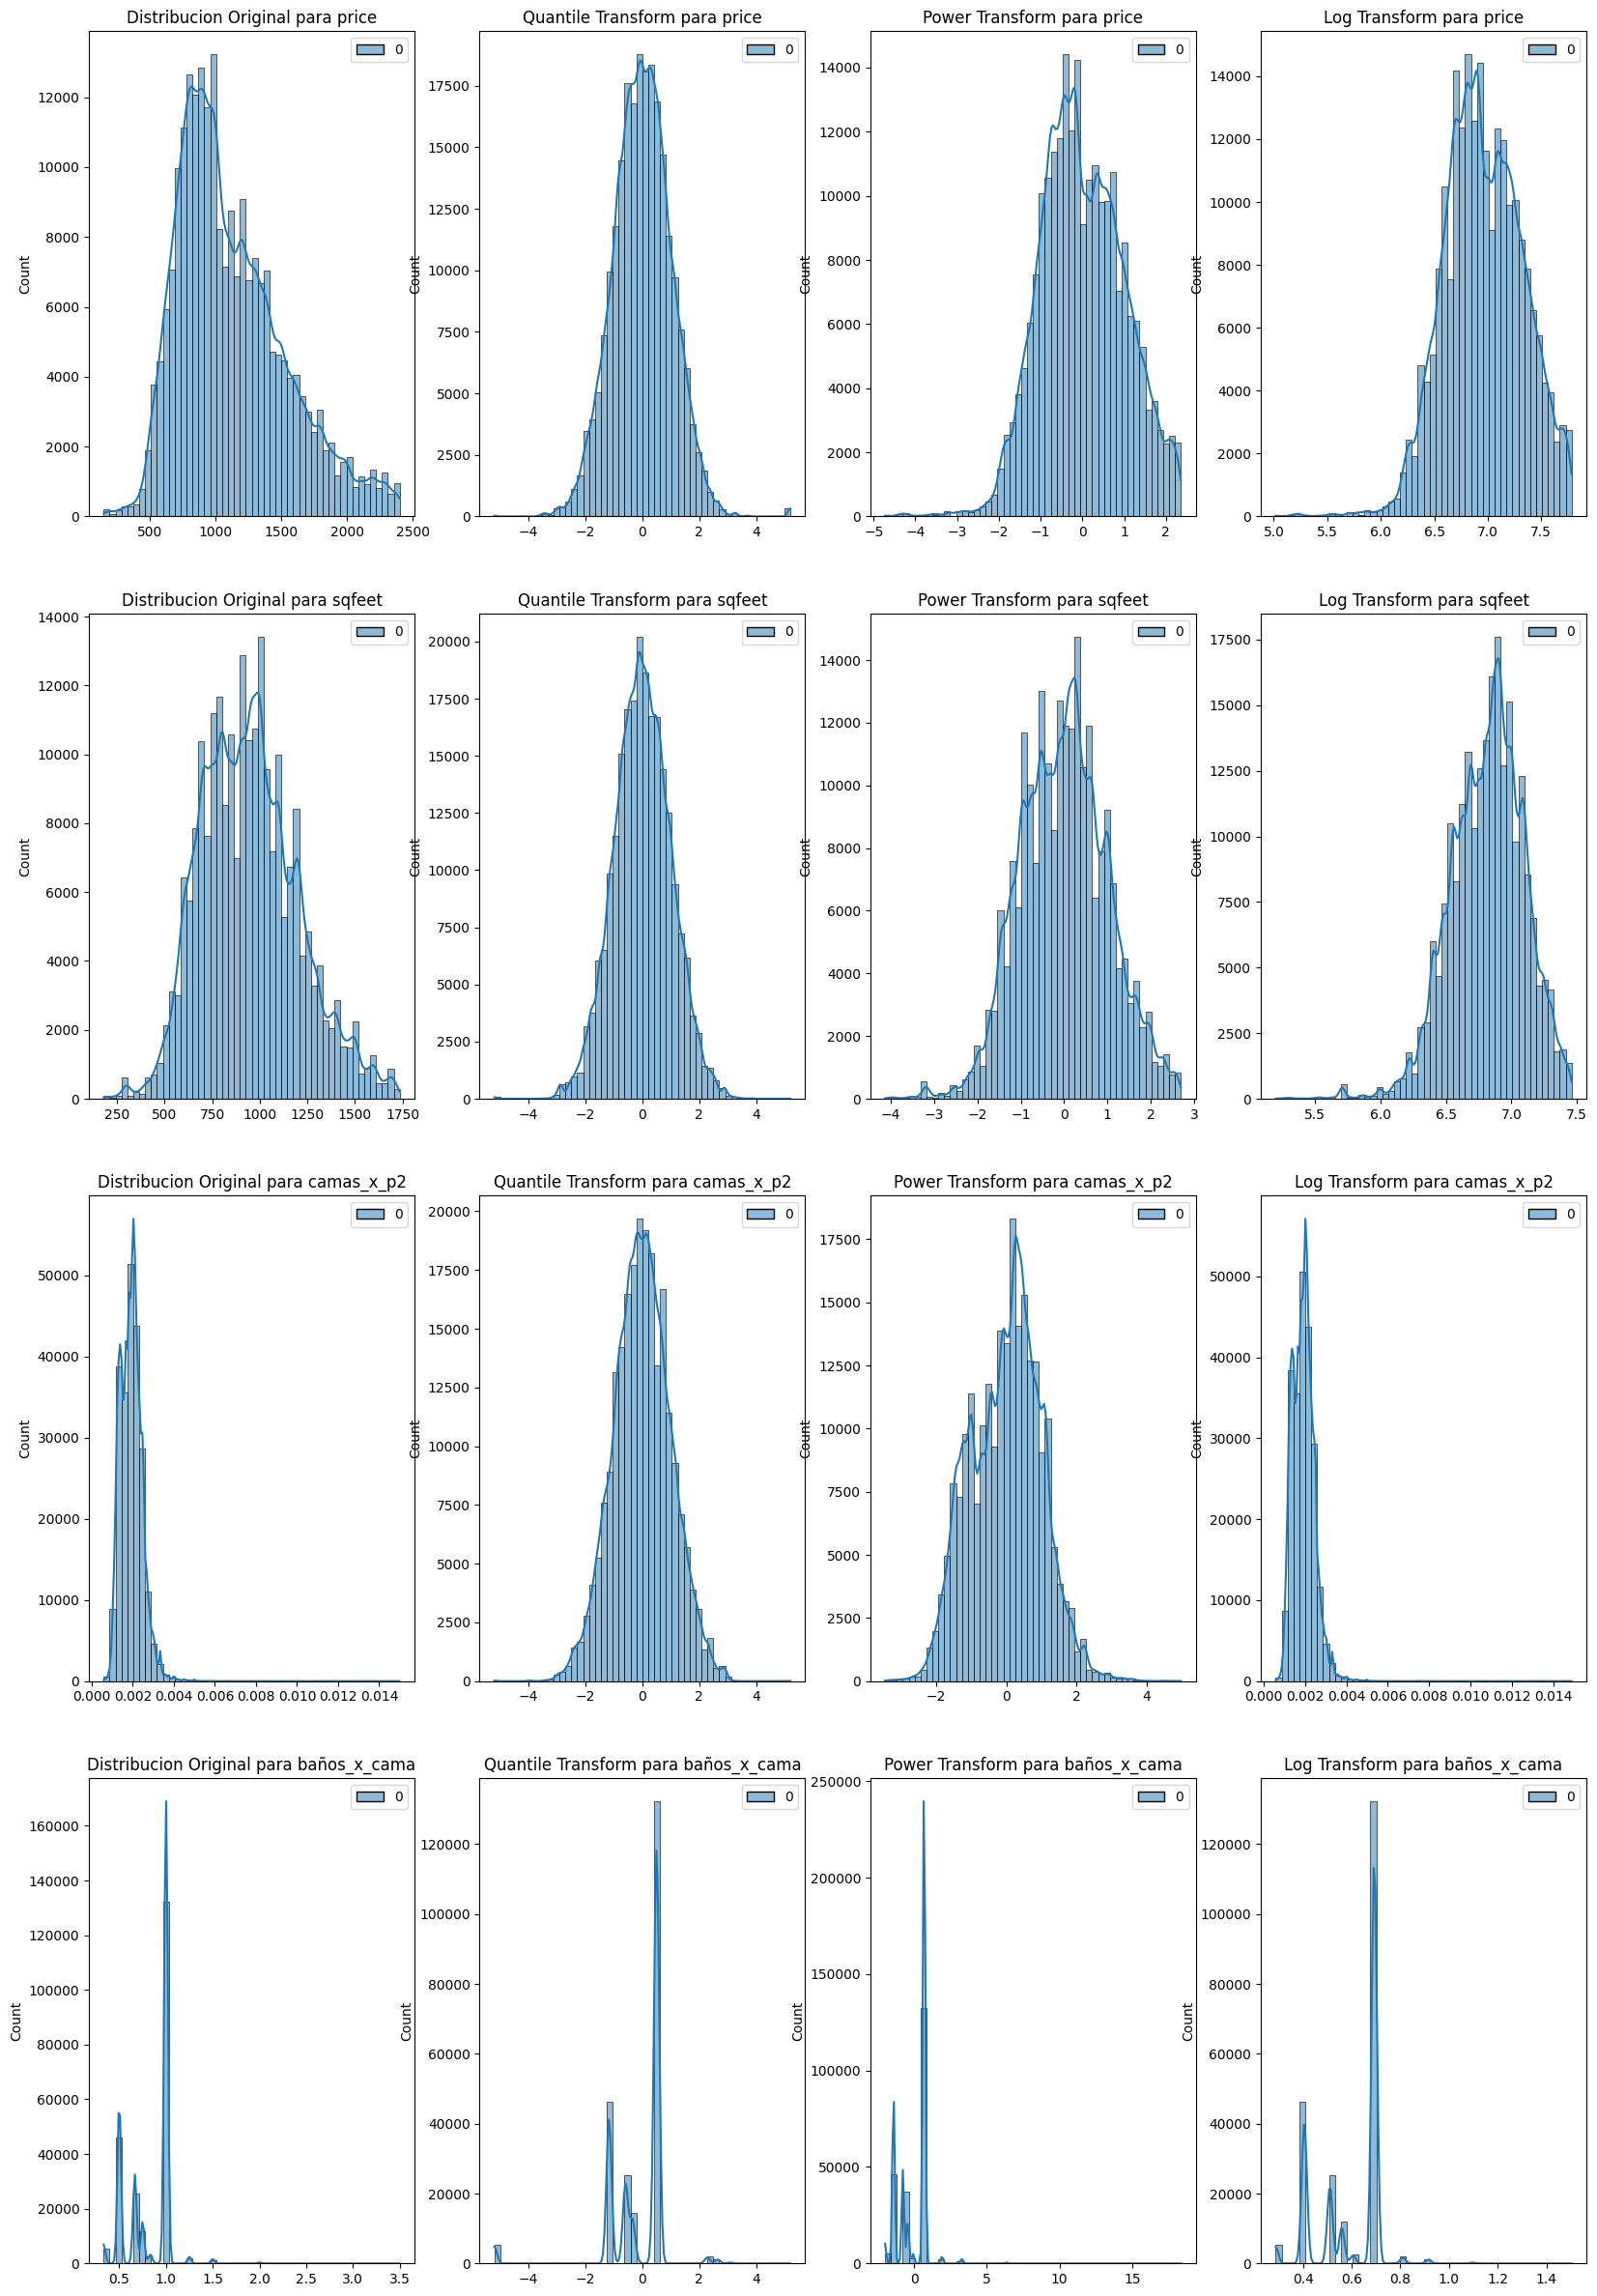

In [38]:
# Visualizo las distribucciones actuales y me fijo como afectarn las distintas transformaciones
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
cols1 = ['price','sqfeet','camas_x_p2','baños_x_cama']
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal', )
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        z = np.log1p(array)
        plt.subplot(4,4,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Distribucion Original para {i}")
        plt.subplot(4,4,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform para {i}")
        plt.subplot(4,4,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform para {i}")
        plt.subplot(4,4,j+3)
        sns.histplot(z, bins = 50, kde = True)
        plt.title(f"Log Transform para {i}")
        j += 4
test_transformers(cols1)

Podemos ver que el quantile transform parece hacer un trabajao mejor con la normalizacion de las varaibles, que es lo que buscabamos


In [39]:
# transofrmamos las variables numericas
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
pt = PowerTransformer()

for var in cols1:
    if var == 'price':
        df[var] = pt.fit_transform(df[var].values.reshape(-1, 1))
    else:   
        df[var] = qt.fit_transform(df[var].values.reshape(-1, 1))

En este caso decidi, usitlizar power transfromer para la varaible price. Ya que estaba teniendo, porblema con la reconversion de la varaible para la parte de evluacion de modelo

In [40]:
#Dataset termiando

df.head()
print(f"Estructura final: {df.shape}")

Estructura final: (227090, 33)


# Creacion del Modelo

In [42]:
# Separo la data entre la varaible que queremos predecir y la data que usaremos para entrenar el modelo 

y=df['price']
X=df.drop(['price'],axis=1)


In [59]:
#Transformacion de la data y creacion de los distintos Data sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


scaler_linear = StandardScaler()

X_scaled = scaler_linear.fit_transform(X)
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (181672, 32)
the shape of the training set (target) is: (181672,)

the shape of the test set (input) is: (45418, 32)
the shape of the test set (target) is: (45418,)


### Regression Lineal

In [44]:
#Entreno modelos
rl_1 = LinearRegression()
rl_1.fit(x_train, y_train)


#Genero predicciones
rl_pred = rl_1.predict(x_test)

### Evaluacion del modelo

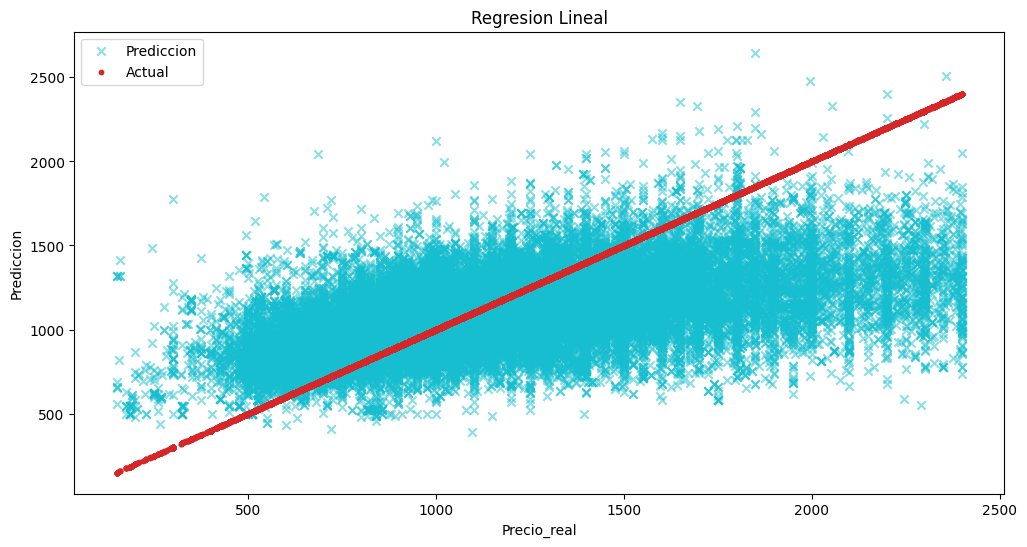

Performance Regresion Lineal:
MAE: 258.48265019485655
RMSE: 348.11297576470514
R2_Score:  0.2910658721688594


In [45]:
# Vuelvo a transformar las variable ( habia transofrmado 'price' previamente)
predictions_inverse = pt.inverse_transform(rl_pred.reshape(-1, 1)).flatten()
# Inverse transform y_test
y_test_inverse = pt.inverse_transform(y_test.values.reshape(-1, 1)).flatten()


#Plot para entender predicciones
pred = pd.DataFrame(data={'Prediccion': predictions_inverse,
                          'Precio_real': y_test_inverse})

# Plot
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Precio_real'], pred['Prediccion'], color='tab:cyan', marker="x", label='Prediccion', alpha=0.5)
ax1.scatter(pred['Precio_real'], pred['Precio_real'], s=10, color='tab:red', marker="o", label='Actual')

plt.xlabel('Precio_real')
plt.ylabel('Prediccion')
plt.title('Regresion Lineal')
plt.legend()
plt.show()

print('Performance Regresion Lineal:')

print('MAE:', metrics.mean_absolute_error(y_test_inverse, predictions_inverse))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_inverse, predictions_inverse)))
print('R2_Score: ', metrics.r2_score(y_test_inverse, predictions_inverse))



El graifco ayuda a entender mejor lo que sucede con el modelo y su relacion con los estimadores. Para entender mejor, los puntos rojos que forman una linea, son los valores verdaderos del precio, por otra lado las 'X' de color cyan son nuestras predicciones. En este caso podemos ver, que el modelo de regresion lineal, no parece ser un buen predictor

### RandomForest

In [78]:
#Entreno modelos
rf_1 = RandomForestRegressor( n_estimators=200, random_state=1)
rf_1.fit(x_train, y_train)

#Genero predicciones
rf_pred = rf_1.predict(x_test)

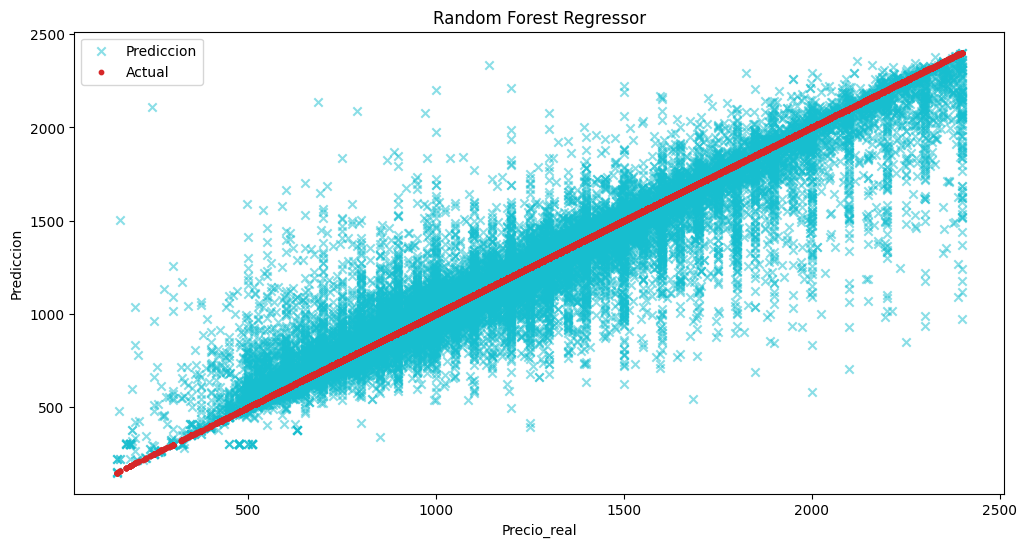

Performance Random Forest Regressor:
MAE: 57.841119898520745
RMSE: 124.9067376863561
R2_Score:  0.9087280789661641


In [79]:

predictions_inverse = pt.inverse_transform(rf_pred.reshape(-1, 1)).flatten()

# Creo el Data frame con la info del mejor modelo
pred = pd.DataFrame(data={'Prediccion': predictions_inverse,
                          'Precio_real': y_test_inverse})

# Plot
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Precio_real'], pred['Prediccion'], color='tab:cyan', marker="x", label='Prediccion', alpha=0.5)
ax1.scatter(pred['Precio_real'], pred['Precio_real'], s=10, color='tab:red', marker="o", label='Actual')

plt.xlabel('Precio_real')
plt.ylabel('Prediccion')
plt.title('Random Forest Regressor')
plt.legend()
plt.show()

print('Performance Random Forest Regressor:')

print('MAE:', metrics.mean_absolute_error(y_test_inverse, predictions_inverse))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_inverse, predictions_inverse)))
print('R2_Score: ', metrics.r2_score(y_test_inverse, predictions_inverse))


En el caso de random forest regressor, podemos ver que sin haber tocado los hyper parametros, muy bueno para mi sorpresa. 

Podemos ver que tiene un muy buen r2 y que tambien poses un muy buen MAE y RMSE

### Regresor XGBoost

In [51]:
# Creacion de modelos
xg_1 = xgb.XGBRegressor(n_estimators = 200, seed=1)
xg_1.fit(x_train, y_train)

#Genero predicciones
xg_pred = xg_1.predict(x_test)

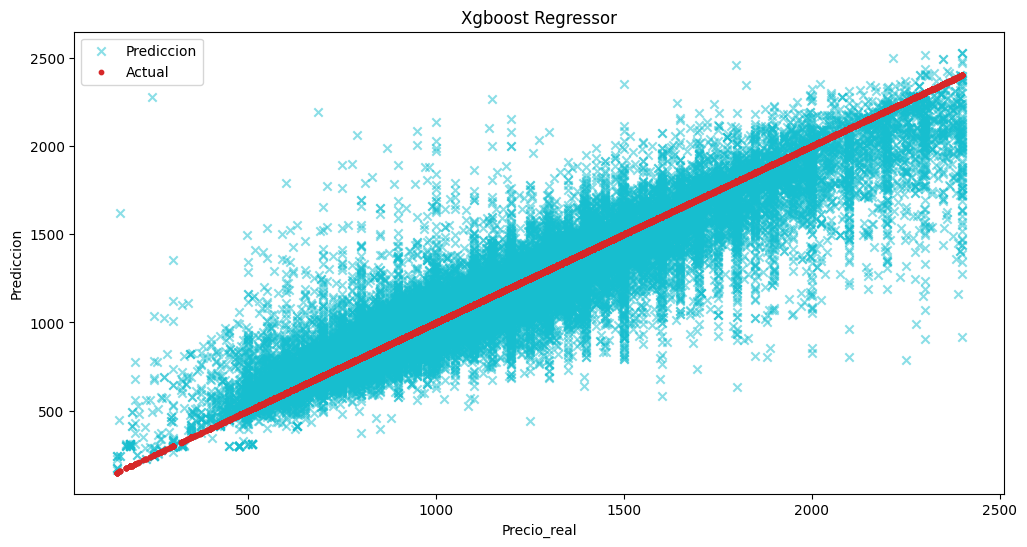

Performance Xgboost Regressor:
MAE: 98.102183563086
RMSE: 153.4978756491491
R2_Score:  0.8621616077180317


In [53]:
predictions_inverse = pt.inverse_transform(xg_pred.reshape(-1, 1)).flatten()

# Creo el Data frame con la info del mejor modelo
pred = pd.DataFrame(data={'Prediccion': predictions_inverse,
                          'Precio_real': y_test_inverse})

# Plot
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Precio_real'], pred['Prediccion'], color='tab:cyan', marker="x", label='Prediccion', alpha=0.5)
ax1.scatter(pred['Precio_real'], pred['Precio_real'], s=10, color='tab:red', marker="o", label='Actual')

plt.xlabel('Precio_real')
plt.ylabel('Prediccion')
plt.title('Xgboost Regressor')
plt.legend()
plt.show()

print('Performance Xgboost Regressor:')

print('MAE:', metrics.mean_absolute_error(y_test_inverse, predictions_inverse))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_inverse, predictions_inverse)))
print('R2_Score: ', metrics.r2_score(y_test_inverse, predictions_inverse))


Al igual, que el random forest, el regresor de Xgboost genero un muy buen modelo base. Pero, podemos ver que si bien el r^2 no esta muy lejos, del otro modelo, en este caso el MAE si tiene bastante diferencia con respecto al modelo anterior

### Conclusion

En base a los 3 resultado que obtuvimos, corriendo los modelos de regresion lineal, random forest regressor y xgboost regressor, se puede ver que, en el caso de la regresion linel obtuimos un mal resultado. Pero no fue el caso, de los otros 2 lo cuales mostraron un muy buen resultado sin la ultiizacion de ninugn hyperparametro


el modelo que obtuvo el mejor resultado fue Random Forest regresor, obteniendo:

- MAE : 57.84
- RMSE ; 124.90
- R2 : 90.87%

### Optimizando de modelo


En esta seccion me voy a dedicar a buscar mejorar y optimizar lo hiperparametros del random forest, para intentar mejorar un poco mas su rendimiento

In [76]:
# Voy a usar un Grid Search con el fin de encontrar los mejores hyperparamentros para el modelo


param_grid = { 
            "n_estimators": [300,400],
            'max_depth': [None,15,20]
            }


# Creamos el modelo base para trabajar sobre este
rf = RandomForestRegressor()
# le decimos que teste con 3 cross validation sets y busque el mejor r2
rf_opt = GridSearchCV(rf, param_grid, scoring='r2', cv=3, verbose=2)

#fitemaos el mejor modelo
rf_opt.fit(x_train, y_train)

# Que nos imprimaos los mejores parametros
print("Mejores hyperparametros: ", rf_opt.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...................max_depth=None, n_estimators=300; total time= 3.5min
[CV] END ...................max_depth=None, n_estimators=300; total time= 3.5min
[CV] END ...................max_depth=None, n_estimators=300; total time= 3.5min
[CV] END ...................max_depth=None, n_estimators=400; total time= 4.9min
[CV] END ...................max_depth=None, n_estimators=400; total time= 8.0min
[CV] END ...................max_depth=None, n_estimators=400; total time= 4.7min
[CV] END .....................max_depth=15, n_estimators=300; total time= 2.5min
[CV] END .....................max_depth=15, n_estimators=300; total time= 2.5min
[CV] END .....................max_depth=15, n_estimators=300; total time= 2.5min
[CV] END .....................max_depth=15, n_estimators=400; total time= 3.3min
[CV] END .....................max_depth=15, n_estimators=400; total time= 3.3min
[CV] END .....................max_depth=15, n_est

Me gustaria aclarar que corri, varios intentos y siempre el mejor modelo fue el base con mas estimadores. Simplemente deje esta seccion, porque es un requermiento de la consigna. Pero considero que dado que el gird en si, no tuve efecto asi al modelo. La mayoira de intento resultaron en modelos, peores.

En este caso, la mejor seleccion de hyperaramentros fue de 400 estimadores y sin profundidad maxima del arbol

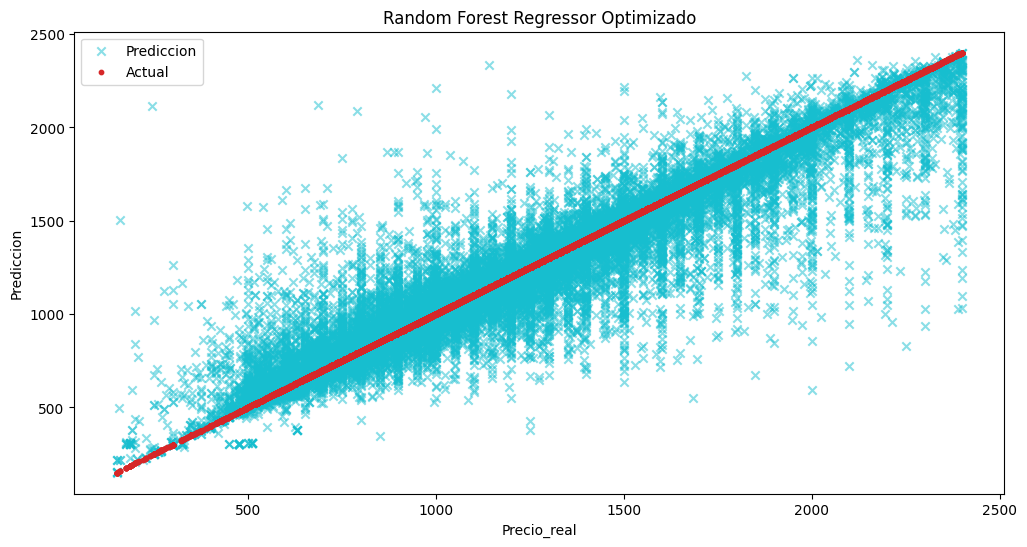

Performance Random Forest Regressor optimizado:
MAE: 57.68189915029307
RMSE: 124.61401590801148
R2_Score:  0.9091553733340575


In [77]:
# generamos prediccionees
rf_opt_pred = rf_opt.predict(x_test)


predictions_inverse = pt.inverse_transform(rf_opt_pred.reshape(-1, 1)).flatten()

# Creo el Data frame con la info
pred = pd.DataFrame(data={'Prediccion': predictions_inverse,
                          'Precio_real': y_test_inverse})

# Plot
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Precio_real'], pred['Prediccion'], color='tab:cyan', marker="x", label='Prediccion', alpha=0.5)
ax1.scatter(pred['Precio_real'], pred['Precio_real'], s=10, color='tab:red', marker="o", label='Actual')

plt.xlabel('Precio_real')
plt.ylabel('Prediccion')
plt.title('Random Forest Regressor Optimizado')
plt.legend()
plt.show()

print('Performance Random Forest Regressor optimizado:')

print('MAE:', metrics.mean_absolute_error(y_test_inverse, predictions_inverse))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_inverse, predictions_inverse)))
print('R2_Score: ', metrics.r2_score(y_test_inverse, predictions_inverse))

Para mi sorpresa de nuevo, como mencione previamente, el modelo no tuvo casi mejorias con las optimiazacion de hyperparametros. Donde el modelo, mantuvo casi los mismo resultados genrales.

Primer modelo:

- MAE : 57.84
- RMSE ; 124.90
- R2 : 90.87%


Modelo bajo hyperparamentros:

- MAE : 57.68
- RMSE ; 124.61
- R2 : 90.92%


# Conclusion del Modelo

Con el EDA pude identificar la relacion del precio, con las distintas variable. Donde identifique que:

- Los precios varian segun el Estado en que se ecuentre la publicacion, existe tanto estado que son mas caros como otros mas baratos
- Los viviendas que tiene espacio para cargar vehiculos electricos, piletas, garage incluido y gimnacio, son mas caras
- Los viviendas de tipo monoambiente, son en promedio mas baratas

Con el random forest regresor pude crear un modelo, que tiene un error medio de 57,68 dolares en relacion a los precios publicado. Cosnidero que estos resultado, son suficientemente buenos como para decir que mi modelo puede cumplir un buen trabajo ayudando a asignar un precio de referncia sobre una viviend en alquiler

